In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter
import matplotlib
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

def get_continuous_cmap(hex_list, float_list=None):

    rgb_list = [matplotlib.colors.to_rgb(i) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

### Performance matrix

In [19]:
root_folder = '/Users/GA/Documents/Dayan_lab/Optimism_And_Pessimism_In_Optimised_Replay/Figures_data/'

In [20]:
# RIP
hex_list = ['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C98'][::-1]

In [75]:
# what = 'perf_matrix'
# data_folder = os.path.join(root_folder, 'fig2/d/%s'%what)

# what = 'rat_matrix'
# data_folder = os.path.join(root_folder, 'supp1/c/%s'%what)

# what = 'pessimism_scale'
# data_folder = os.path.join(root_folder, 'supp1/b/%s'%what)

what = 'entropy_range'
data_folder = os.path.join(root_folder, 'supp1/a/%s'%what)

# n = 150
# tmp = np.zeros((n, n))

# for i in range(n):
#     z = np.load(os.path.join(data_folder, what+'_%u.npy'%i))
#     tmp[i, :] = z

n    = 101
tmp  = np.load(data_folder+'_smoothed.npy')
bias = tmp

In [41]:
np.save(os.path.join(root_folder, 'supp1/c/%s.npy'%what), tmp)

In [63]:
# bias = tmp
bias = gaussian_filter(tmp, 1.5)

In [43]:
np.save(os.path.join(root_folder, 'supp1/c/%s_smoothed.npy'%what), bias)

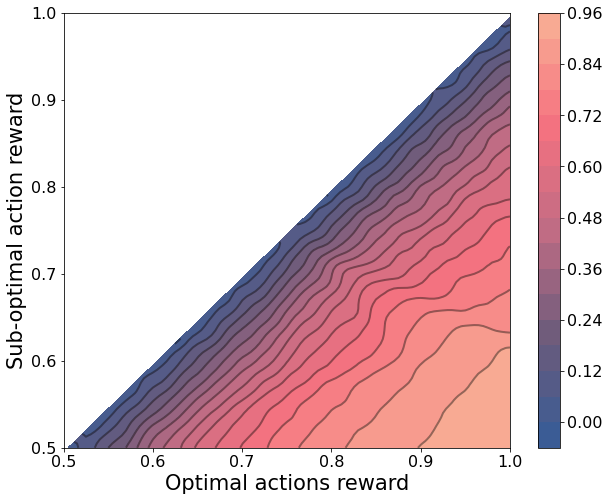

In [76]:
# fig = plt.figure(figsize=(10, 8))
fig = plt.figure(figsize=(10, 8))

x = np.linspace(0.5, 1, n)
y = np.linspace(0.5, 1, n)

X, Y = np.meshgrid(y, x)

# k = 6
k = 16
plt.contourf(X, Y, bias, k, cmap=get_continuous_cmap(hex_list))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)

plt.contour(X, Y, bias, k, colors=['k']*k, linewidths=2, alpha=0.4);
plt.xlabel('Optimal actions reward', fontsize=21);
plt.ylabel('Sub-optimal action reward', fontsize=21);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

plt.savefig(os.path.join(root_folder, 'supp1/a/%s.svg'%what), transparent=True)